# Introduction to Speech Processing

This notebook demonstrates basic operations in speech processing and signal processing in Python.

Specifically:
* Audio signal IO
* Calculating spectrum and spectrogram of speech sounds
* Speech processing using librosa and pydub

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

from pydub import AudioSegment
from pydub.utils import mediainfo

speech = AudioSegment.from_wav('./resources/arctic_a0005.wav') 

Check the sampling rate and the number of samples in an audioo file.

In [2]:
x = speech.get_array_of_samples()
x_sr = speech.frame_rate
print('Sampling rate: ', x_sr)
print('Number of samples: ', len(x))

Sampling rate:  16000
Number of samples:  22640


Get the duration of an audio file

In [3]:
duration = librosa.get_duration(filename = './resources/arctic_a0005.wav')
n_samples = duration * x_sr
print('duration: ', duration)
print('n_samples: ', n_samples)

duration:  1.415
n_samples:  22640.0


## 1. Audio signal IO

We can visualise the signal x in time domain using the following code

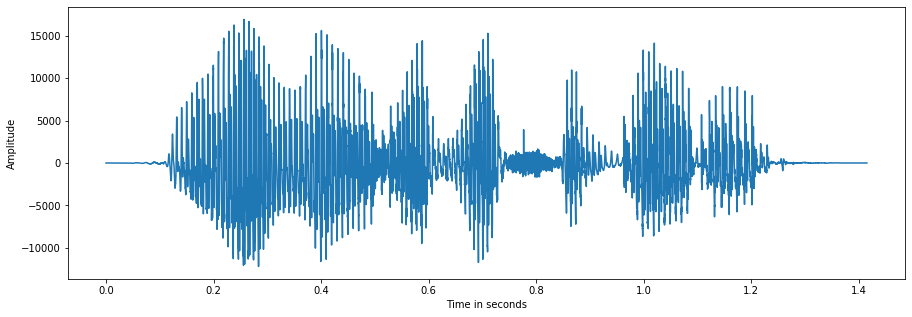

In [4]:
x_range = np.linspace(0, duration, len(x))

plt.figure(figsize = (15, 5))
plt.plot(x_range, x)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.savefig('x.png')

Now, suppose that we want to divide the signal x into two equal parts, named x1 and x2, i.e., each part has
11320 samples. We then store those parts into .wav files. 

To save audio data to .wav files, you can pydub as follows.

In [ ]:
mid_point = int(len(x) / 2)
x1 = x[0:mid_point]

x2 = x[mid_point:len(x)]

x1_audio = AudioSegment(
                        data = x1,
                        sample_width = 2,
                        frame_rate = x_sr,
                        channels = 1)

x2_audio = AudioSegment(
                        data = x2,
                        sample_width = 2,
                        frame_rate = x_sr,
                        channels = 1)

x1_audio.export('arctic_a0005_1.wav', format = 'wav')
x2_audio.export('arctic_a0005_2.wav', format = 'wav')

Read in arctic_a0005_1.wav and plot the Time domain.

In [11]:
x1_speech = AudioSegment.from_wav('arctic_a0005_1.wav')
x1 = x1_speech.get_array_of_samples()
x1_sr = x1_speech.frame_rate
x1_duration = librosa.get_duration(filename = 'arctic_a0005_1.wav')
x1_n_samples = x1_duration * x1_sr
print('Sampling rate: ', x1_sr)
print('Number of samples: ', len(x1))
print('duration: ', x1_duration)
print('n_samples: ', x1_n_samples)

Sampling rate:  16000
Number of samples:  11320
duration:  0.7075
n_samples:  11320.0


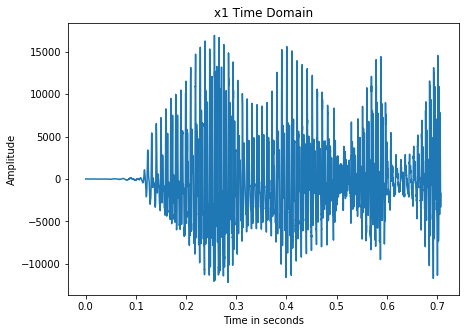

In [13]:
x1_range = np.linspace(0, x1_duration, len(x1))

plt.figure(figsize = (7, 5))
plt.plot(x1_range, x1)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.title('x1 Time Domain')
plt.savefig('x1.png')

Read in arctic_a0005_2.wav and plot the Time domain

In [14]:
x2_speech = AudioSegment.from_wav('arctic_a0005_2.wav')
x2 = x2_speech.get_array_of_samples()
x2_sr = x2_speech.frame_rate
x2_duration = librosa.get_duration(filename = 'arctic_a0005_2.wav')
x2_n_samples = x2_duration * x2_sr
print('Sampling rate: ', x1_sr)
print('Number of samples: ', len(x1))
print('duration: ', x1_duration)
print('n_samples: ', x1_n_samples)

Sampling rate:  16000
Number of samples:  11320
duration:  0.7075
n_samples:  11320.0


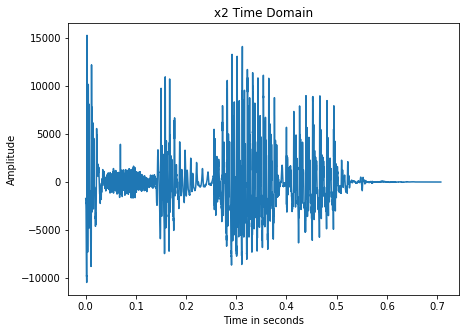

In [15]:
x2_range = np.linspace(0, x2_duration, len(x2))

plt.figure(figsize = (7, 5))
plt.plot(x2_range, x2)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.title('x2 Time Domain')
plt.savefig('x2.png')

## 2. Fourier Transform

In this section, we will apply the Fourier transform on audio signals to compute the spectrograms of the signals.
In practice, we do not calculate the Fourier transform of a signal on its entire time domain but only on short
temporal segments. These temporal segments are called frames and detected using windowing techniques.

In [16]:
freq_range = 1024

win_length = int(x_sr * 0.03)

hop_length = int(win_length / 2)

window = 'hann'

X = librosa.stft(np.float32(x),
                 n_fft = freq_range,
                 window = window,
                 hop_length = hop_length,
                 win_length = win_length)

librosa.stft returns an array, e.g., X. This array includes freq_range/2+1 rows corresponding to the frequencies in
[0, freq_range/2]. 

**Note:** Since both the input and output of the Fourier transform can be sequences of complex
values, the Fourier transform produces the spectra for both the real and imaginary components with the same
frequency range. In our case, since x is a sequence of real values, the spectra for the real and imaginary
components will be symmetric and thus only one spectrum is generated. This explains the rows in X.

Print the shape of X

In [17]:
print(X.shape)

(513, 95)


X actually contains the spectrogram of x. To visualise X, we can perfrom:

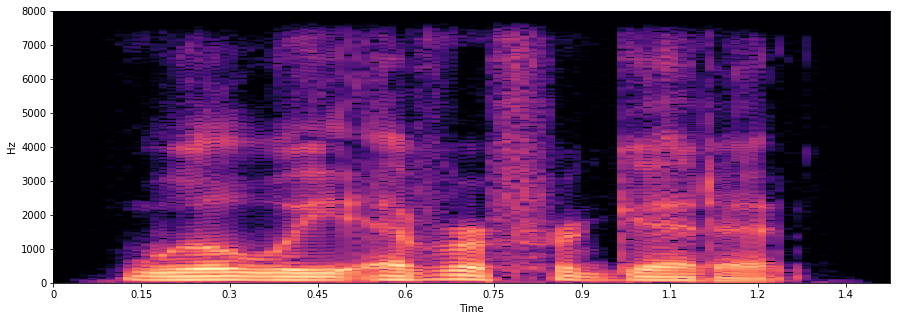

In [18]:
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X))

librosa.display.specshow(Xdb,
                         sr = x_sr,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)

We can then repeat this for the for X1 and X2 from the previous section.

In [19]:
X1 = librosa.stft(np.float32(x1),
                 n_fft = freq_range,
                 window = window,
                 hop_length = hop_length,
                 win_length = win_length)

X2 = librosa.stft(np.float32(x2),
                 n_fft = freq_range,
                 window = window,
                 hop_length = hop_length,
                 win_length = win_length)

Display x1 spectrogram

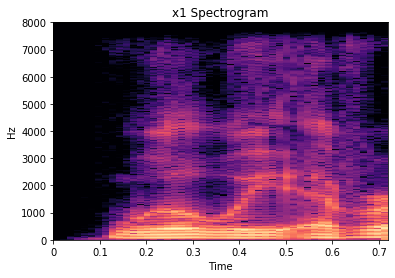

In [20]:
Xdb = librosa.amplitude_to_db(abs(X1))

librosa.display.specshow(Xdb,
                         sr = x_sr,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)
plt.title('x1 Spectrogram')
plt.savefig('x1_spectrogram.png')

Display x1 spectrogram

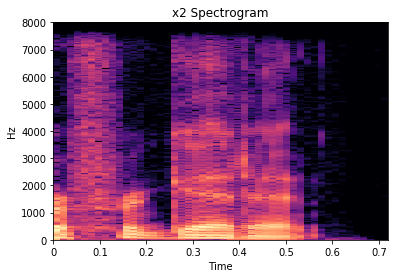

In [21]:
Xdb = librosa.amplitude_to_db(abs(X2))

librosa.display.specshow(Xdb,
                         sr = x_sr,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)
plt.title('x2 Spectrogram')
plt.savefig('x2_spectrogram.png')

To better interpret the Fourier transform, we perform a simulation as follows. Suppose that we have two signals
s1 and s2 defined as,

s1(t)=A1sin(2πf1t)

s2(t)=A2sin(2πf2t)

where A1=1, f1=50, A2=0.5, f2=80

We now define, s(t)=s1(t)+s2(t)

Generate composite signal from 2 separate signals

In [30]:
#number of samples
N = 600

T = 1.0 / N
t = np.linspace(0.0, N*T, N)
s1 = np.sin(50.0 * 2.0 * np.pi * t)
s2 = 0.5 * np.sin(80.0 * 2.0 * np.pi * t)
s = s1 + s2

We can visualise s1, s2, and s as,

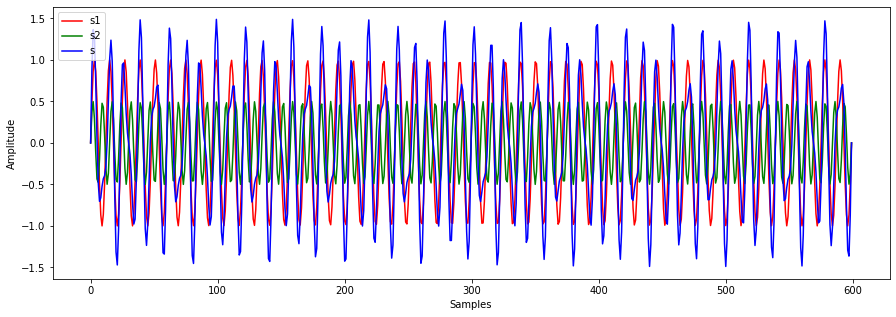

In [31]:
plt.figure(figsize = (15, 5))
plt.plot(s1, label = 's1', color = 'r')
plt.plot(s2, label = 's2', color = 'g')
plt.plot(s, label = 's', color = 'b')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend(loc = "upper left")

It can be seen clearly that s(t) is formed by two sinusoidal signals s1(t) and s2(t) of different frequencies. Thus, it
is expected that the Fourier transform S of s should have two peaks corresponding to the two frequencies of s1
and s2. However, when we call librosa.stft, we will get a different result as shown below.

Perform STFT on the s signal.

C:\Users\justi\Anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]


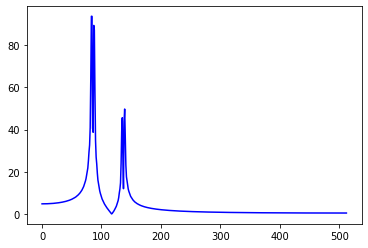

In [32]:
S = librosa.stft(s, n_fft = 1024, window = 'hann', hop_length = N, win_length = N)
S_0 = S[:, 0]
mag_S_0 = np.abs(S_0)
plt.plot(mag_S_0, color = 'b')

Theoretically, the Fourier transform of a signal with infinite domain. However, in this example, we apply the
Fourier transform on a finite and truncated signal. To calculate the Fourier transform of truncated signals,
librosa.stft uses windowing techniques. However, windowing techniques are sensitive to the borders of the
truncated signals. In the above code, we set win_length=N and hop_length=N, i.e., the window fully covers the
truncated signal, and this explains the situation.

To mitigate the above effects, instead of using a window fully covering the entire truncated signal, we can use a
smaller window by setting win_length to a smaller value. In addition, instead of using the Fourier transform of a
border frame, e.g., S_0=S[:,0], we can take the Fourier transform of an intermediate frame as in the code below.

C:\Users\justi\Anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]


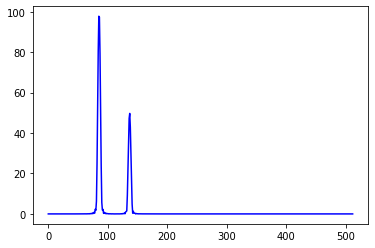

In [33]:
m = 400

S = librosa.stft(s, n_fft = 1024, window = 'hann', hop_length = int(m / 2), win_length = m)

S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)

plt.plot(mag_S_1, color = 'b')

Next up I experimented with the Short-time Fourier transformations (STFT) using the librosa library to better
understand the impact of the various windowing techniques (boxcar, hann and hamming). A generated signal was used
which was comprised of 2 separate simulated signals. I then performed STFT on the signal using the various window
types. In this case I used s window size of 400 and a hop length of 100 (win_length/4). The results of each window
technique can be seen in images below.

C:\Users\justi\Anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]
C:\Users\justi\Anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]
C:\Users\justi\Anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]


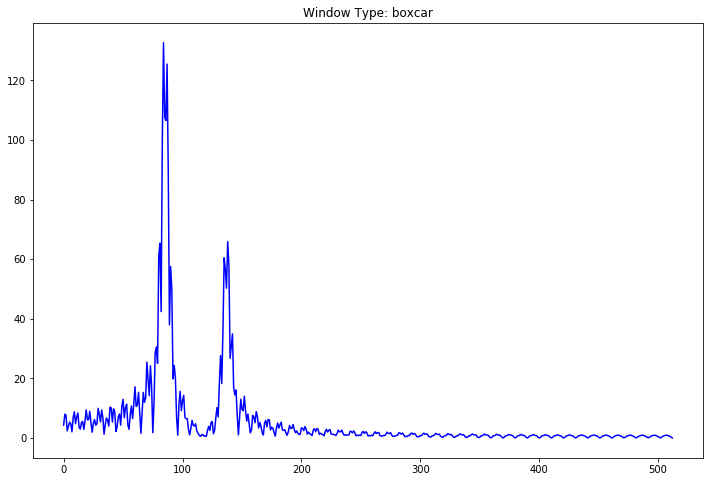

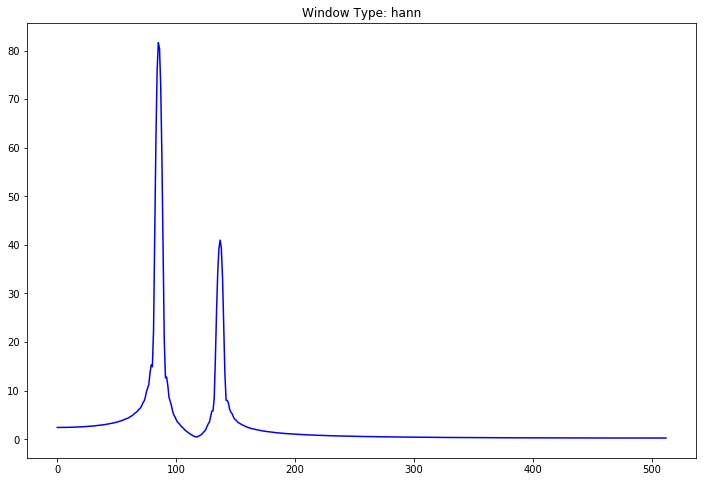

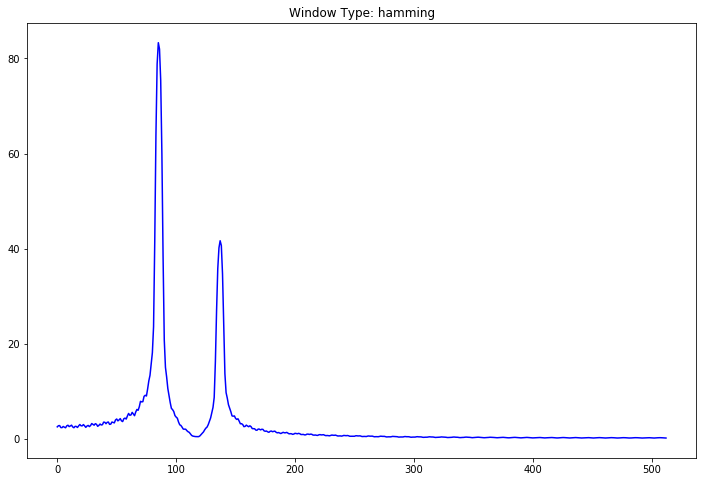

In [34]:
windows = ['boxcar', 'hann', 'hamming']

for wt in windows:
    m = 400
    S = librosa.stft(s, n_fft = 1024, window = wt, hop_length = int(m / 4), win_length = m)
    S_1 = S[:, 1]
    mag_S_1 = np.abs(S_1)
    plt.figure(figsize=(12,8))
    plt.title(f'Window Type: {wt}')
    plt.plot(mag_S_1, color = 'b')
    plt.savefig(f'{wt}.png')
plt.show()

The first observation is that all windowing methods show 2 primary spikes on the graph. This signifies the 2 different
frequencies used to construct the simulated signal. Below are the observations

**Boxcar Window**
The plot using the boxcar window type is very jittery/spikey. The size of the spike increases as the y value increases. The
boxcar window is a rectangle and as such leads to discontinuities near the border resulting in artifacts

**Hann Window**
The hann window produced quiet a smooth plot. This is because the hann window is a cosine shaped window which
smooths to 0 on its boundaries sort of like a tall bell curve

**Hamming Window**
The hamming window type also produces a similar plot to the hann window. This is due to the window for hamming
also being a cosine shaped window (tall bell curve). The hamming window differs from the hann in that it does not
smooth to 0 on its boundaries. Instead it stops just shy of 0 and results in some discontinuities. This can be seen in the
plot where at the lower magnitudes there is a bit of bumpiness.